In [94]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from tqdm import trange

# Dataset creation

In [20]:
x, y = make_classification()
x.shape, y.shape

((100, 20), (100,))

In [8]:
n_features = x.shape[1]
n_features

20

In [21]:
n_examples = x.shape[0]
n_examples

100

# Weight init

In [86]:
theta = np.random.normal(size=(n_features))
theta

array([ 0.08150569, -0.00404648, -0.29091259,  0.79056852, -0.45088197,
        0.73291459,  0.29098545, -1.44219246,  0.28113616, -1.91185713,
       -1.13930566,  0.72361253,  0.10668733,  0.02573337,  0.43395258,
       -0.17638471, -0.44909324, -1.64774506,  1.06660019, -2.23706748])

# Hypothesis Function

In [87]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
    
def h(x):
    z = theta.dot(x)
    return sigmoid(z)
    
# for LR, hypothesis is sigmoid

# Cost Function

In [88]:
# cost function of LR is negative log-likelihood
def J(theta):
    cost = 0
    for i in range(n_examples):
        ll = (y[i] * np.log(h(x[i]))) + ((1-y[i]) * np.log(1-h(x[i])))
        cost += ll
    return (-cost)/n_examples

In [89]:
J(theta)

2.0210438580969674

# Training

In [103]:
theta = np.random.normal(size=(n_features))

alpha = 0.1
n_iter = 1000

js = []

for epoch in trange(n_iter):
    # do gradient descent per feature
    for j in range(n_features):
        dj_dtheta_j = 0
        for i in range(n_examples):
            dj_dtheta_j += (h(x[i]) - y[i]) * x[i][j]
        dj_dtheta_j /= n_examples         
        theta[j] -= alpha * dj_dtheta_j 
            
    js.append(J(theta))
    
#     print(f'iter={epoch}, J={J(theta)}')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 225.36it/s]


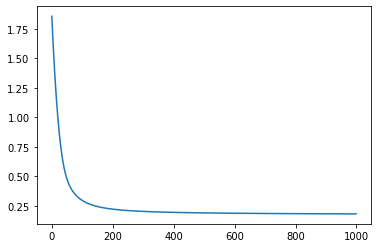

In [104]:
plt.plot(range(n_iter), js)

In [105]:
correct = 0
for i in range(n_examples):
    if h(x[i]) >= 0.5:
        if y[i] == 1:
            correct += 1
    else:
        if y[i] == 0:
            correct += 1
            
correct / n_examples

0.95

# Sklearn


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix


In [69]:
clf = LogisticRegression(verbose=True).fit(x, y)

RUNNING THE L-BFGS-B CODE

           * * *



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D+01    |proj g|=  4.80343D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     13     15      1     0     0   2.335D-04   2.476D+01
  F =   24.755705090779429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [70]:
accuracy_score(y, clf.predict(x))

0.94